# Dfs2

[DFS - Reference manual](https://docs.mikepoweredbydhi.com/core_libraries/dfs/dfs-file-system/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

## Reading data

In [2]:
ds = mikeio.read("data/gebco_sound.dfs2")
ds

<mikeio.Dataset>
Dimensions: (time:1, y:264, x:216)
Time: 2020-05-15 11:04:52 (time-invariant)
Items:
  0:  Elevation <Total Water Depth> (meter)

In [3]:
type(ds)

mikeio.dataset.Dataset

In [4]:
ds.shape

(1, 264, 216)

In [5]:
elevation = ds['Elevation']
type(elevation)

mikeio.dataarray.DataArray

In [6]:
elevation.shape

(1, 264, 216)

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

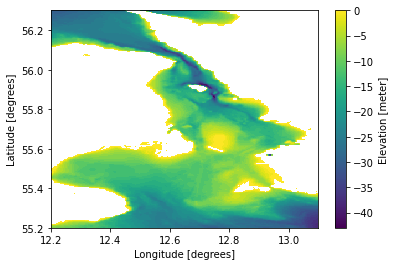

In [7]:
elevation.plot()

## Spatial axes

In [8]:
ds.geometry

<mikeio.Grid2D>
x-axis: nx=216 points from x0=12.2021 to x1=13.0979 with dx=0.00416667
y-axis: ny=264 points from y0=55.2021 to y1=56.2979 with dy=0.00416667
Number of grid points: 57024

## Extract data at location

In [10]:
stn = 12.74792, 55.865
da_stn = elevation.interp(x=stn[0], y=stn[1])
da_stn

<mikeio.DataArray>
Name: Elevation
Dimensions: (time:1)
Time: 2020-05-15 11:04:52 (time-invariant)

In [11]:
da_stn.values

array([-42.69764539])

In [ ]:
plt.subplots(figsize=(12,8))
plt.imshow(elevation[0])
plt.colorbar()
plt.scatter(j,k,marker='*',s=500,c='black')
plt.title("Indexed by row/column")

In [ ]:
plt.subplots(figsize=(12,8))
plt.imshow(elevation[0], extent=(lons[0], lons[-1], lats[0], lats[-1]))
plt.scatter(stn[0],stn[1],marker='*',s=500,c='black')
plt.title("Indexed by spatial coordinates")
plt.text(12.85, 56.0, "Sweden")
plt.text(12.3, 55.8, "Denmark")

In [ ]:
import numpy as np

# Find minimum value
idx_1d = np.nanargmin(elevation)
idx_1d

In [ ]:
idx = np.unravel_index(idx_1d, elevation.shape)
idx

In [ ]:
elevation[idx]

## Slicing

In [ ]:
plt.imshow(elevation[0])
plt.axvline(j)
plt.axhline(k)

In [ ]:
plt.plot(lats, elevation[0,:,j])
plt.title("North-South")

In [ ]:
plt.plot(lons, elevation[0,k,:])
plt.title("West-East")

## Writing data

### Geographical coordinates

In [12]:
data_i = np.arange(24).reshape(2,4,3)
data_i.shape

(2, 4, 3)

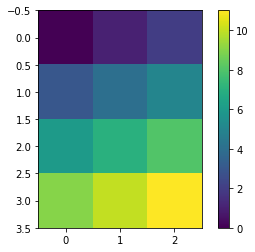

In [13]:
plt.imshow(data_i[0]) # first timestep
plt.colorbar()

In [24]:
grid = mikeio.Grid2D(x0 = 12.0, dx= 1.0, y0= 55.0, dy=1.0, shape=(3,4), projection="LONG/LAT")
grid

<mikeio.Grid2D>
x-axis: nx=3 points from x0=12 to x1=14 with dx=1
y-axis: ny=4 points from y0=55 to y1=58 with dy=1
Number of grid points: 12

In [25]:
import pandas as pd

nt = data_i.shape[0]

da = mikeio.DataArray(data = data_i,
                      geometry=grid,
                     time = pd.date_range("2020",periods=nt,freq='D'),
                     item= mikeio.ItemInfo("Example", mikeio.EUMType.Elevation))

da

<mikeio.DataArray>
Name: Example
Dimensions: (time:2, y:4, x:3)
Time: 2020-01-01 00:00:00 - 2020-01-02 00:00:00 (2 records)

In [27]:
ds = mikeio.Dataset([da])
ds

<mikeio.Dataset>
Dimensions: (time:2, y:4, x:3)
Time: 2020-01-01 00:00:00 - 2020-01-02 00:00:00 (2 records)
Items:
  0:  Example <Elevation> (meter)

In [28]:
ds.to_dfs("example_geo.dfs2")

Screenshot from MIKE Zero (viridis palette).

:::{note}
Note the location of the origin.
:::


![](images/example_dfs2_geo.png)

### Projected coordinates


Projection string in WKT format. Use MIKE Zero for formatting. Some shorthands are available for UTM zones, e.g. UTM-32.

:::{warning}
TODO: Dfs2 with projected coordinates should work as easy as geographical coordinates.
:::

In [29]:
from mikecore.Projections import Cartography

proj = Cartography.CreateProjOrigin("UTM-32", east=337100.0, north=6122900.0, orientationProj=0.0)
proj.ProjectionString

'PROJCS["UTM-32",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",9],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]'

In [30]:
proj.LonOrigin, proj.LatOrigin, proj.Orientation

(6.438741601179531, 55.22570782640155, -2.104289814530738)

In [33]:
from mikeio import Dfs2

dfs = Dfs2()
dfs.write("example_proj.dfs2",
          data=ds, 
          coordinate=[proj.ProjectionString, proj.LonOrigin, proj.LatOrigin, proj.Orientation],
          dx=10000, dy=10000)


Screenshot from MIKE Zero using a projected coordinate system.

![](images/example_dfs2_proj.png)